In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from img_statistics import *

In [111]:
def read_img(img, full_path = './dataset/data_with_mask_otsu/', grey = True, format = ".jpg"):
    img_out = cv2.imread(f"{full_path}{img}{format}")
    image_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
    if grey:
        img_out = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    return img_out

In [112]:
def read_img_hsv(img, full_path = './dataset/data_with_mask_otsu/', format = ".jpg"):
    img_out = cv2.imread(f"{full_path}{img}{format}")
    image_hsv = cv2.cvtColor(img_out, cv2.COLOR_BGR2HSV)
    return image_hsv

In [113]:
df_anno = pd.read_csv("dataset/HAM10000_metadata.csv")

In [114]:
df_anno

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

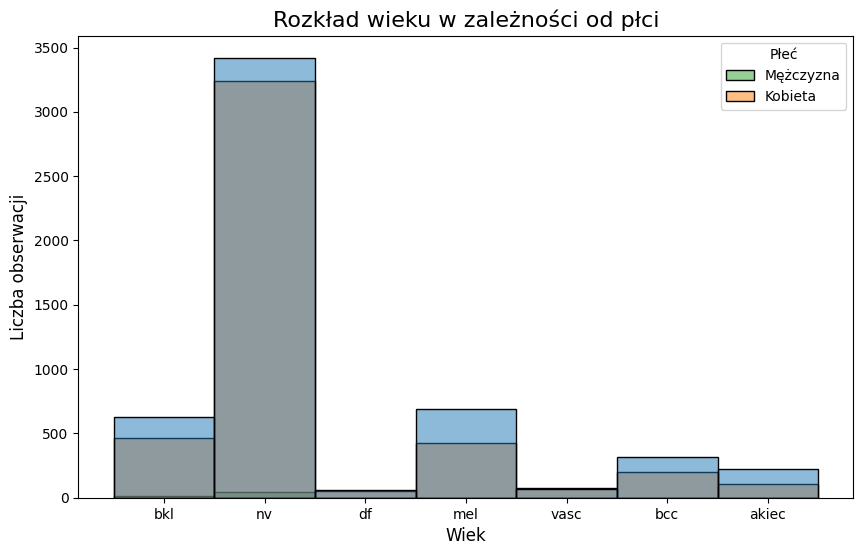

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_anno, x="dx", hue="sex", kde=False, bins=20)

plt.title("Rozkład wieku w zależności od płci", fontsize=16)
plt.xlabel("Wiek", fontsize=12)
plt.ylabel("Liczba obserwacji", fontsize=12)
plt.legend(title="Płeć", labels=["Mężczyzna", "Kobieta"])
plt.show()

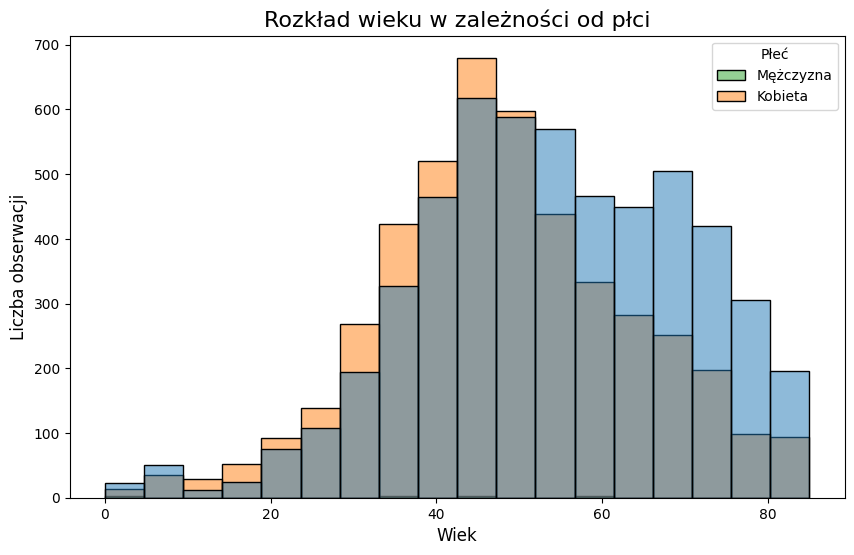

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_anno, x="age", hue="sex", kde=False, bins = 18)

plt.title("Rozkład wieku w zależności od płci", fontsize=16)
plt.xlabel("Wiek", fontsize=12)
plt.ylabel("Liczba obserwacji", fontsize=12)
plt.legend(title="Płeć", labels=["Mężczyzna", "Kobieta"])
plt.show()

In [117]:
pivot_table = df_anno.pivot_table(
    index="localization",  
    columns="dx",          
    values="lesion_id",    
    aggfunc="count",       
    fill_value=0           
)
pivot_table.loc["suma"] = pivot_table.sum()
print(pivot_table)


dx               akiec  bcc   bkl   df   mel    nv  vasc
localization                                            
abdomen              5   18    42    4    66   860    27
acral                0    0     0    0     0     7     0
back                29  186   202    2   324  1427    22
chest               12   47    74    0    68   200     6
ear                  3    0     6    0    17    30     0
face               113  101   319    0   104   100     8
foot                 0    4     1    2    28   284     0
genital              0    0     2    1     0    45     0
hand                13    2    14    0     1    55     5
lower extremity     65   58   174   82   192  1479    27
neck                10   14    31    0    29    81     3
scalp               14   19    34    0    14    45     2
trunk                1   11    73    0    47  1241    31
unknown              0    5    23    0    10   196     0
upper extremity     62   49   104   24   213   655    11
suma               327  514  10

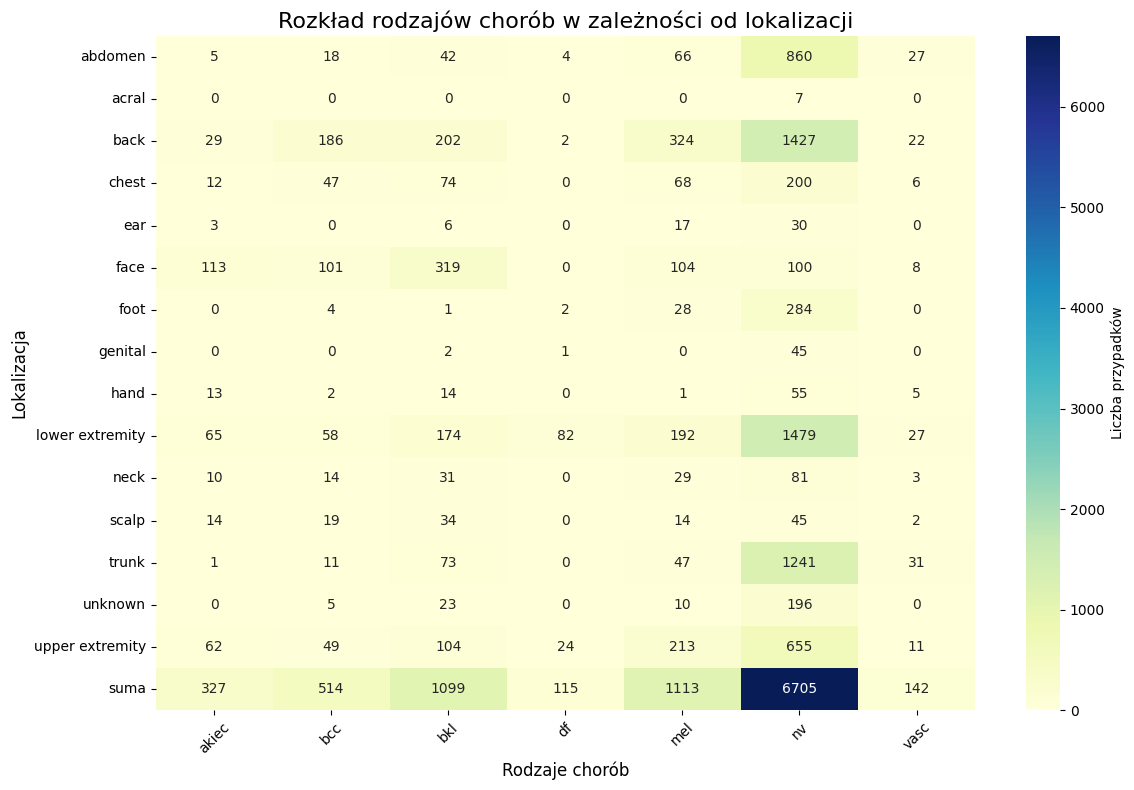

In [118]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=pivot_table,
    annot=True,          
    fmt="d",             
    cmap="YlGnBu",       
    cbar_kws={"label": "Liczba przypadków"}  
)

plt.title("Rozkład rodzajów chorób w zależności od lokalizacji", fontsize=16)
plt.xlabel("Rodzaje chorób", fontsize=12)
plt.ylabel("Lokalizacja", fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [119]:
df_anno

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [120]:
ints = np.random.randint(len(df_anno.image_id), size = (12))

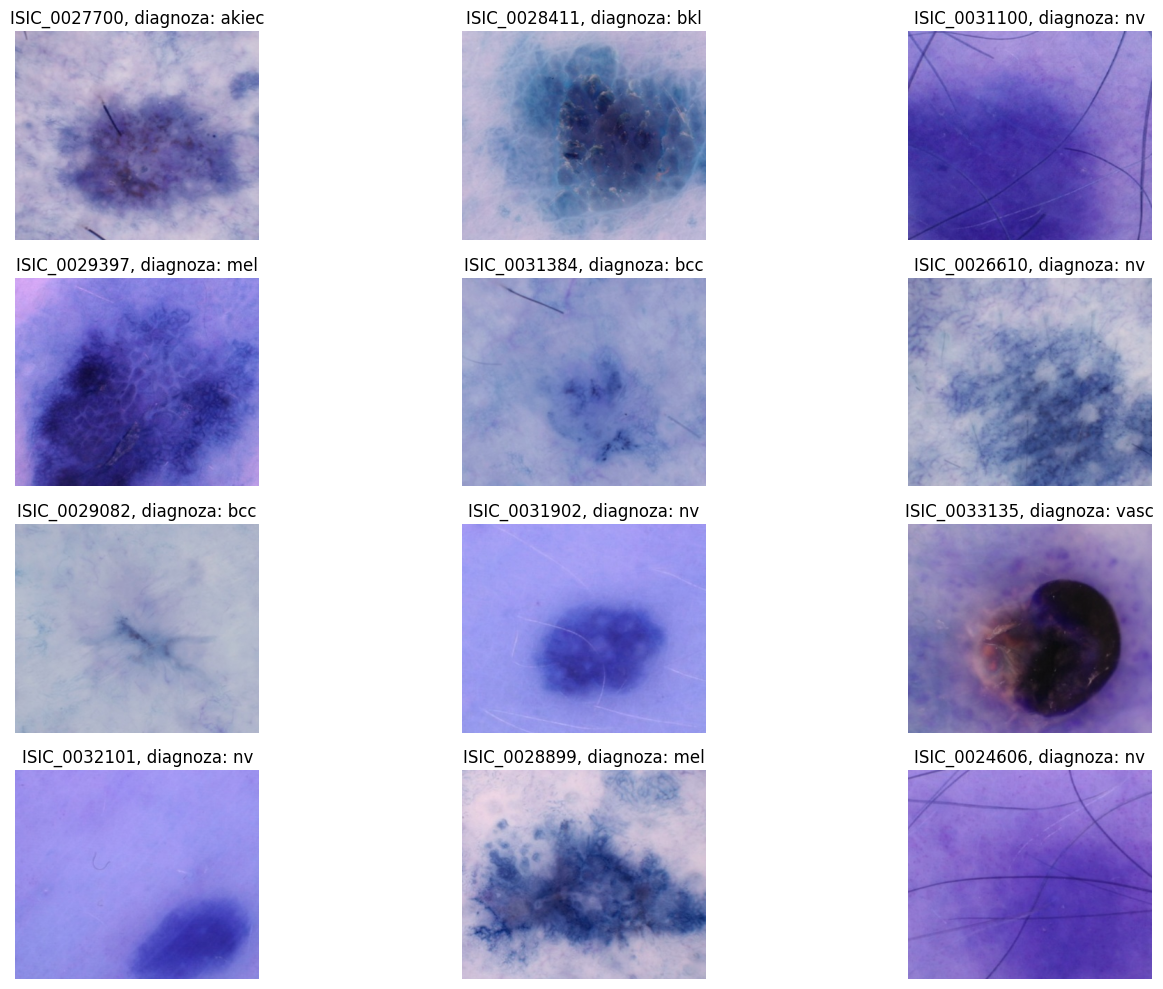

In [121]:
rows = 4
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
to_iter = 0
for row in range(rows):
    for col in range(cols):
        i = ints[to_iter]
        path = df_anno.image_id.iloc[i]
        vis_image = read_img(path, grey= False)
        axs[row, col].imshow(vis_image[50:350, 100:450])
        axs[row, col].set_title(f"{path}, diagnoza: {df_anno.dx.iloc[i]}")
        axs[row, col].axis('off')
        to_iter += 1

plt.tight_layout()
plt.show()

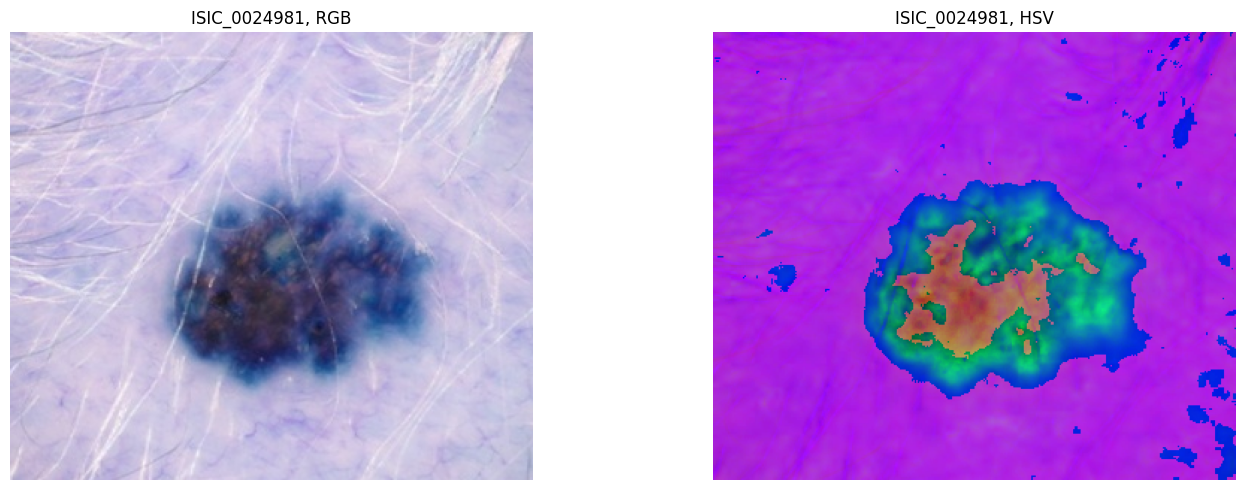

In [122]:
i = 33
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

path = df_anno.image_id.iloc[i]
vis_image = read_img(path, grey=False)
hsv_image = read_img_hsv(path)
axs[0].imshow(vis_image[50:350, 100:450])
axs[0].set_title(f"{path}, RGB")
axs[0].axis('off')
axs[1].imshow(hsv_image[50:350, 100:450])
axs[1].set_title(f"{path}, HSV")
axs[1].axis('off')
plt.tight_layout()
plt.show()

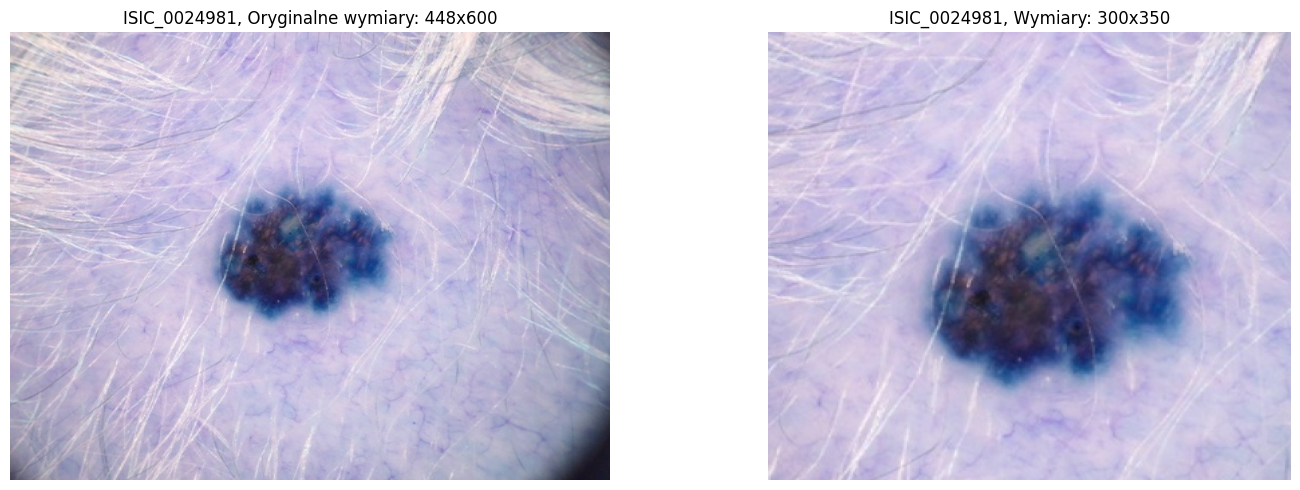

In [123]:
i = 33
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

path = df_anno.image_id.iloc[i]
vis_image = read_img(path, grey=False)
axs[0].imshow(vis_image)
axs[0].set_title(f"{path}, Oryginalne wymiary: 448x600")
axs[0].axis('off')
axs[1].imshow(vis_image[50:350, 100:450])
axs[1].set_title(f"{path}, Wymiary: 300x350")
axs[1].axis('off')
plt.tight_layout()
plt.show()

In [124]:
def niblack_threshold(image, window_size, k):
    mean = cv2.boxFilter(image.astype(np.float32), ddepth=-1, ksize=(window_size, window_size))
    sq_mean = cv2.boxFilter(image.astype(np.float32)**2, ddepth=-1, ksize=(window_size, window_size))
    std = np.sqrt(sq_mean - mean**2)
    
    threshold = mean + k * std
    return threshold

In [125]:
def sauvola_threshold(image, window_size, k, r=128):
    mean = cv2.boxFilter(image.astype(np.float32), ddepth=-1, ksize=(window_size, window_size))
    sq_mean = cv2.boxFilter(image.astype(np.float32)**2, ddepth=-1, ksize=(window_size, window_size))
    std = np.sqrt(sq_mean - mean**2)
    
    threshold = mean * (1 + k * ((std / r) - 1))
    return threshold

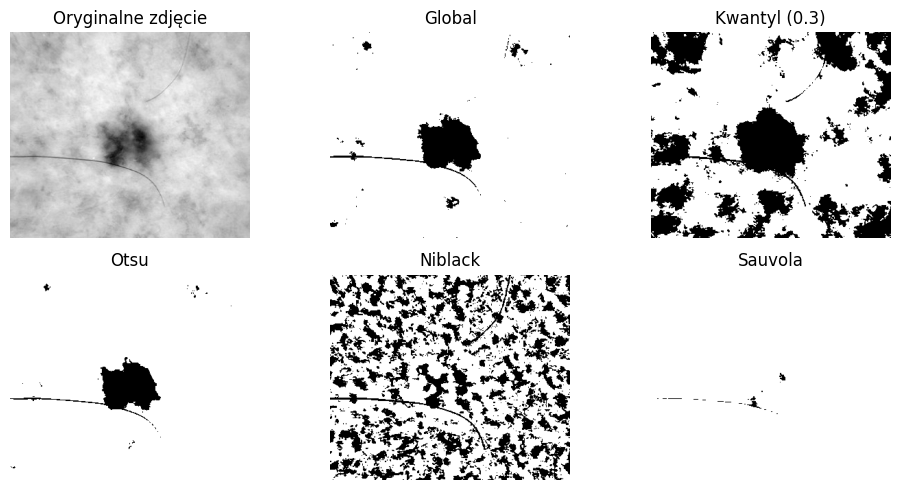

In [126]:
i = 44
path = df_anno.image_id.iloc[i]
image = read_img(path, grey=True)[50:350, 100:450]

window_size = 25  
k_niblack = -0.2  
k_sauvola = 0.3   

_, global_thresh_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

quantile_threshold = np.quantile(image, 0.3)
_, statistical_thresh_img = cv2.threshold(image, int(quantile_threshold), 255, cv2.THRESH_BINARY)

_, otsu_thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

niblack_thresh = niblack_threshold(image, window_size, k_niblack)
sauvola_thresh = sauvola_threshold(image, window_size, k_sauvola)

niblack_binary = (image > niblack_thresh).astype(np.uint8) * 255
sauvola_binary = (image > sauvola_thresh).astype(np.uint8) * 255

fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0,0].imshow(image, cmap='gray')
axs[0,0].set_title("Oryginalne zdjęcie")
axs[0,0].axis('off')

axs[0,1].imshow(global_thresh_img, cmap='gray')
axs[0,1].set_title(f"Global")
axs[0,1].axis('off')

axs[0,2].imshow(statistical_thresh_img, cmap='gray')
axs[0,2].set_title(f"Kwantyl (0.3)")
axs[0,2].axis('off')

axs[1,0].imshow(otsu_thresh_img, cmap='gray')
axs[1,0].set_title("Otsu")
axs[1,0].axis('off')

axs[1,1].imshow(niblack_binary, cmap='gray')
axs[1,1].set_title("Niblack")
axs[1,1].axis('off')

axs[1,2].imshow(sauvola_binary, cmap='gray')
axs[1,2].set_title("Sauvola")
axs[1,2].axis('off')

plt.tight_layout()
plt.show()

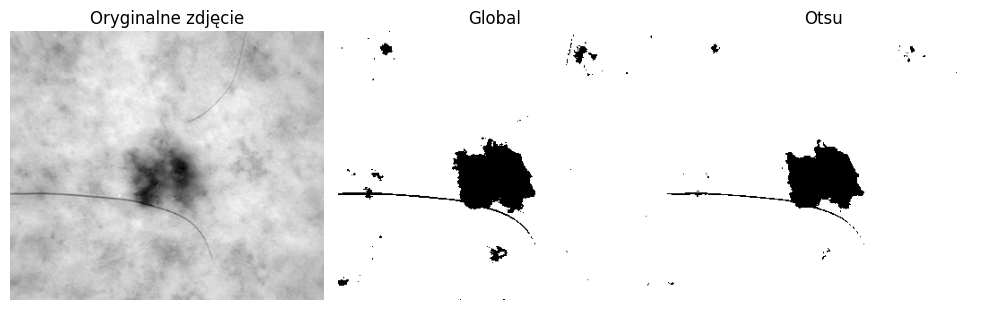

In [127]:
i = 44
path = df_anno.image_id.iloc[i]
image = read_img(path, grey=True)[50:350, 100:450]

_, global_thresh_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
_, otsu_thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Oryginalne zdjęcie")
axs[0].axis('off')

axs[1].imshow(global_thresh_img, cmap='gray')
axs[1].set_title(f"Global")
axs[1].axis('off')


axs[2].imshow(otsu_thresh_img, cmap='gray')
axs[2].set_title("Otsu")
axs[2].axis('off')

plt.tight_layout()
plt.show()

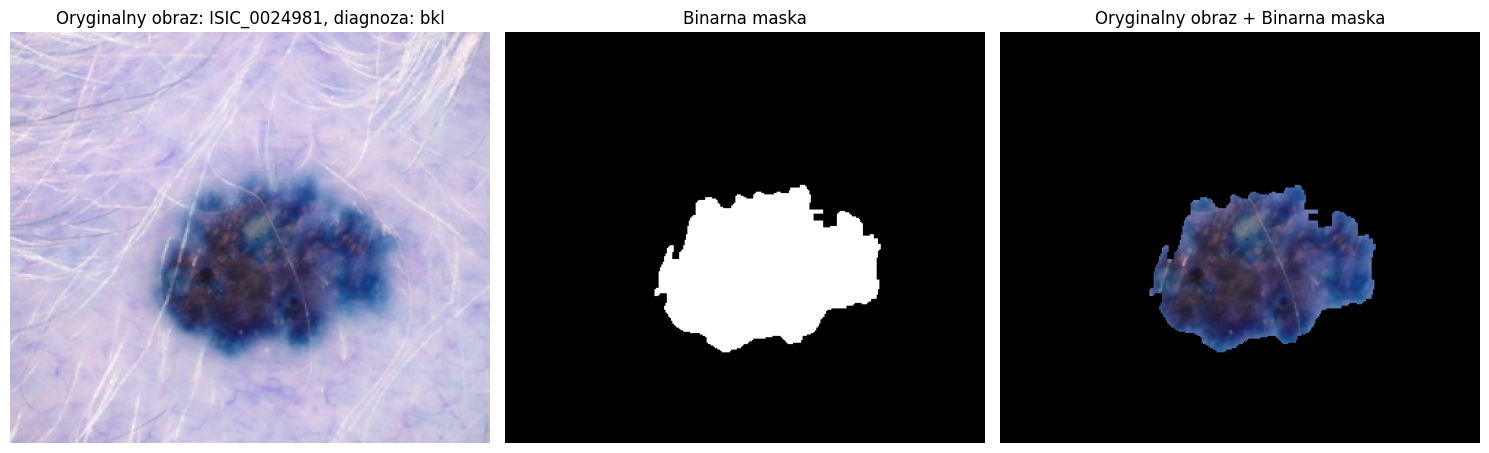

In [128]:
i = 33
path = df_anno.image_id.iloc[i]
#path = "ISIC_0026057"
vis_image = read_img(path, grey= False)
gray_image = read_img(path, grey= False)
mask_path = path + '_mask'
mask = read_img(mask_path, grey= True)/255
#mask = np.expand_dims(mask, axis = -1)
zoomed = gray_image[50:350, 100:450]/255
mask = np.expand_dims(mask, axis = -1)
combined = zoomed*mask
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(vis_image[50:350, 100:450])
axs[0].set_title(f"Oryginalny obraz: {path}, diagnoza: {df_anno.dx.iloc[i]}")
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')  
axs[1].set_title("Binarna maska")
axs[1].axis('off')

axs[2].imshow(combined, cmap='gray')
axs[2].set_title("Oryginalny obraz + Binarna maska")
axs[2].axis('off')

plt.tight_layout()
plt.show()


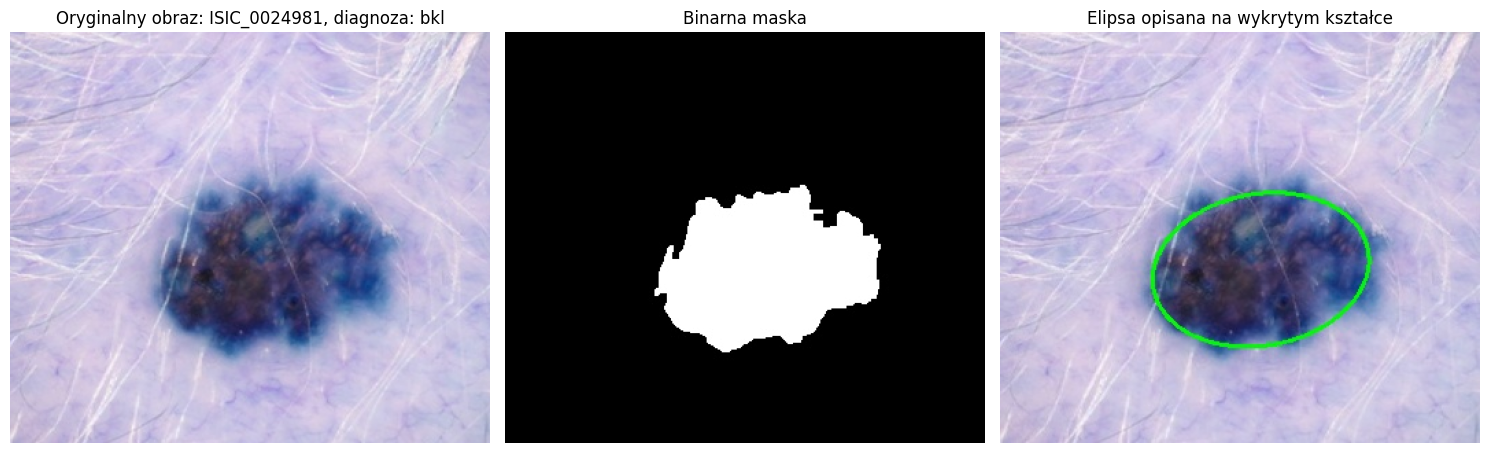

In [129]:
i = 33
path = df_anno.image_id.iloc[i]
#path = "ISIC_0026057"
vis_image = read_img(path, grey= False)
gray_image = read_img(path, grey= False)
mask_path = path + '_mask'
elipse_path = path + '_elipse'
mask = read_img(mask_path, grey= True)/255
elipse = read_img(elipse_path,grey = False)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(vis_image[50:350, 100:450])
axs[0].set_title(f"Oryginalny obraz: {path}, diagnoza: {df_anno.dx.iloc[i]}")
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')  
axs[1].set_title("Binarna maska")
axs[1].axis('off')

axs[2].imshow(elipse, cmap='gray')
axs[2].set_title("Elipsa opisana na wykrytym kształce")
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [137]:
plt.rcParams['font.size'] = 20  

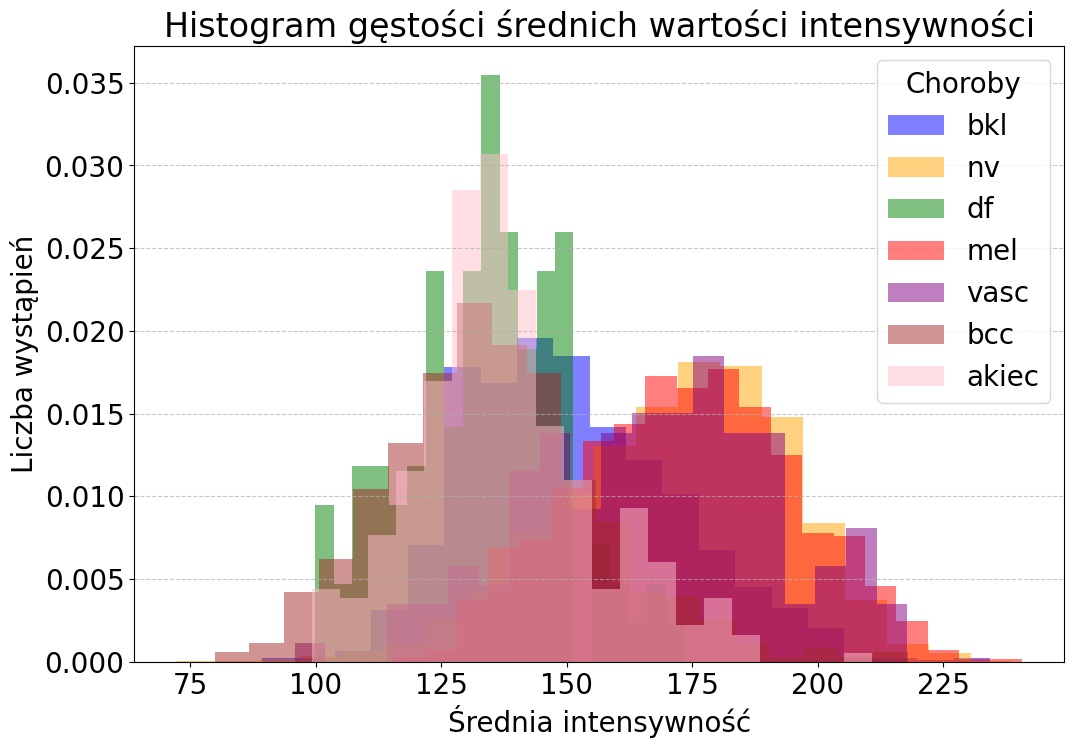

In [138]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask
    combined_no_zeros = np.mean(combined[combined != 0])

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości średnich wartości intensywności")
plt.xlabel("Średnia intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


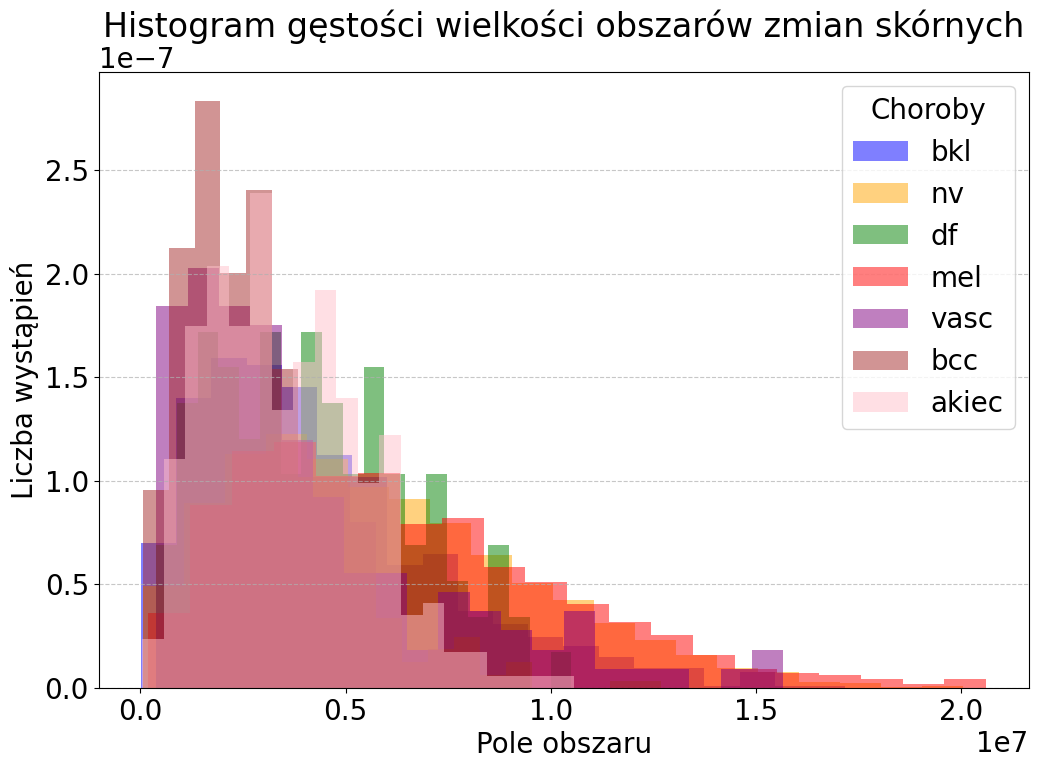

In [139]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask

    combined_no_zeros = np.sum(combined[combined != 0])

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości wielkości obszarów zmian skórnych")
plt.xlabel("Pole obszaru")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


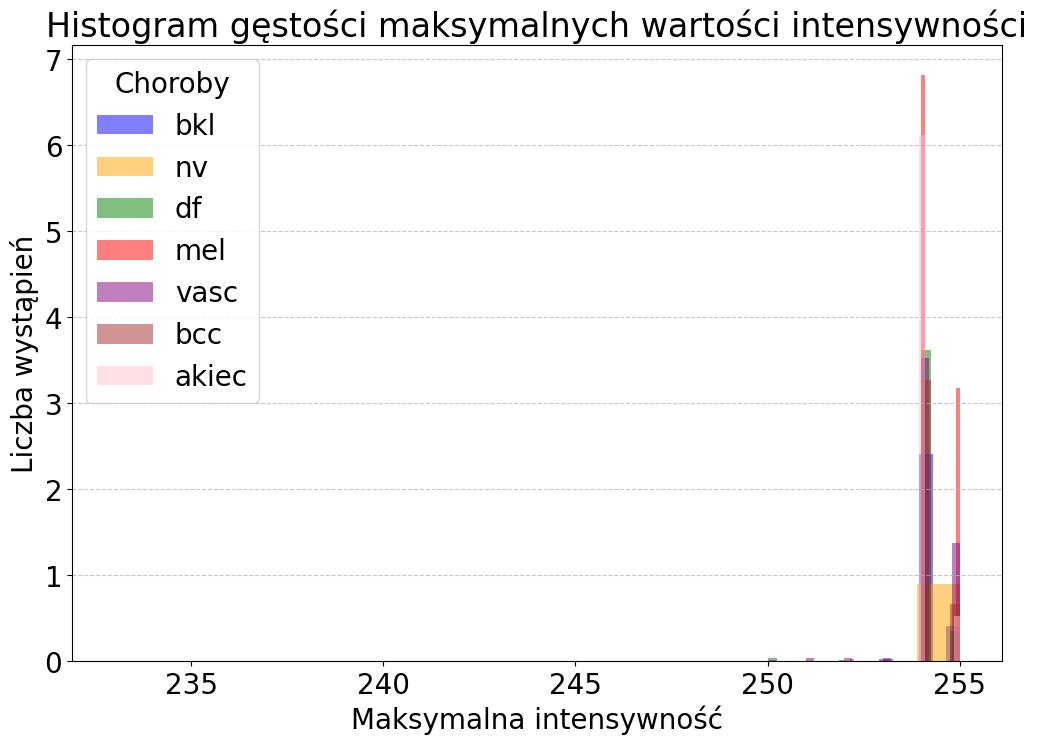

In [140]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask

    combined_no_zeros = np.max(combined[combined != 0])

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości maksymalnych wartości intensywności")
plt.xlabel("Maksymalna intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

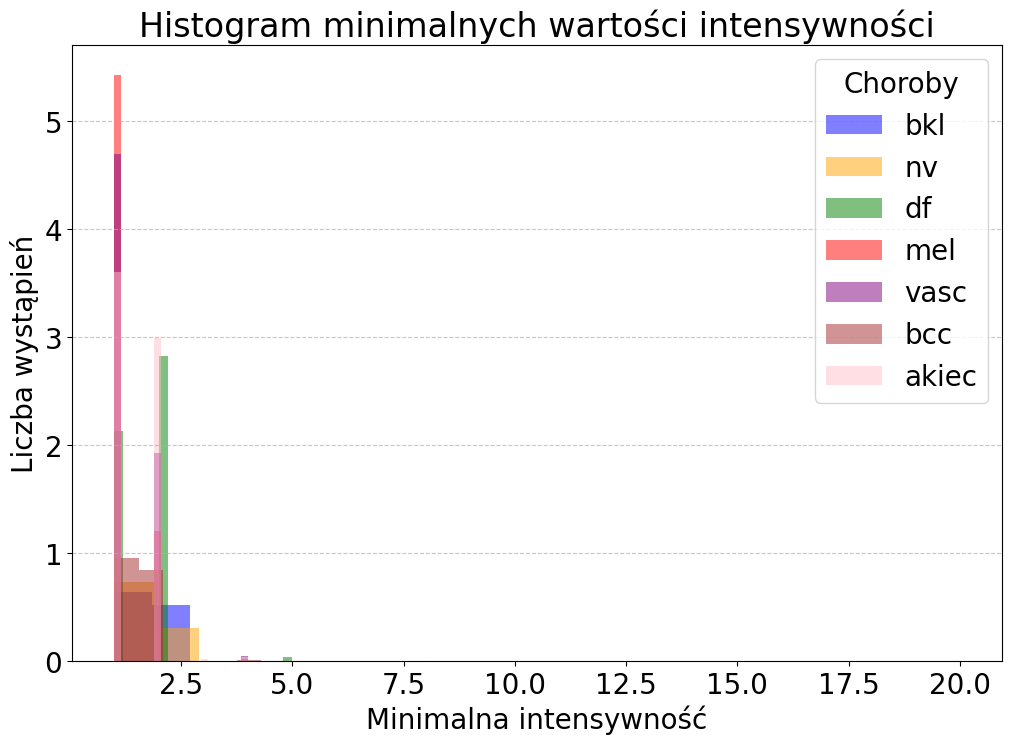

In [141]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask

    combined_no_zeros = np.min(combined[combined != 0])

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram minimalnych wartości intensywności")
plt.xlabel("Minimalna intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

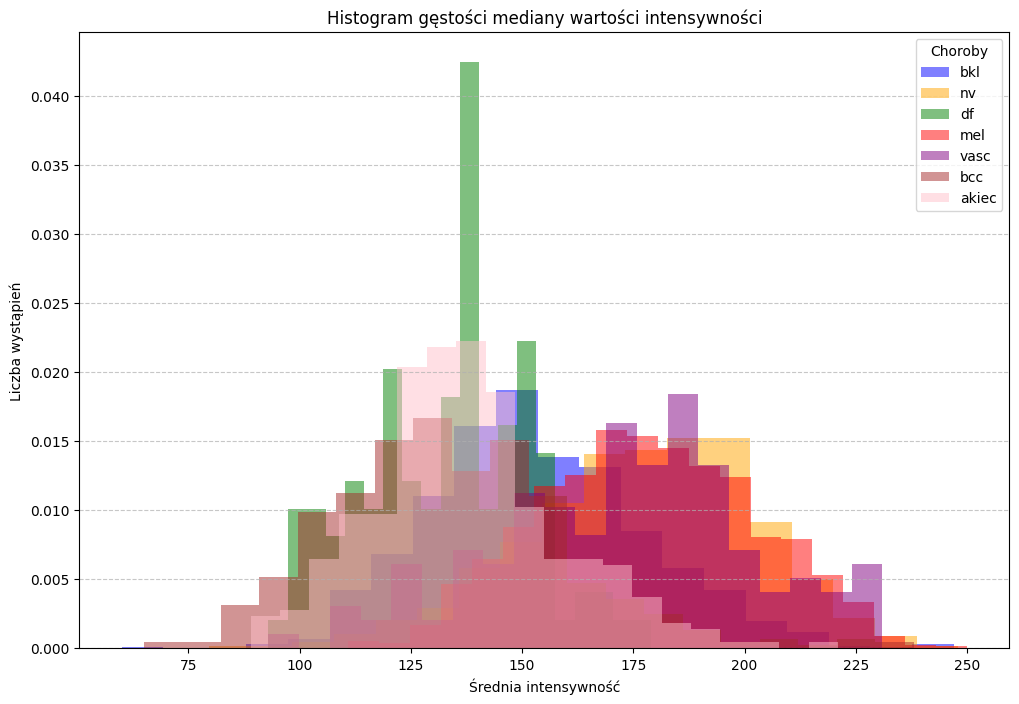

In [105]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask
    combined_no_zeros = np.median(combined[combined != 0])

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości mediany wartości intensywności")
plt.xlabel("Średnia intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


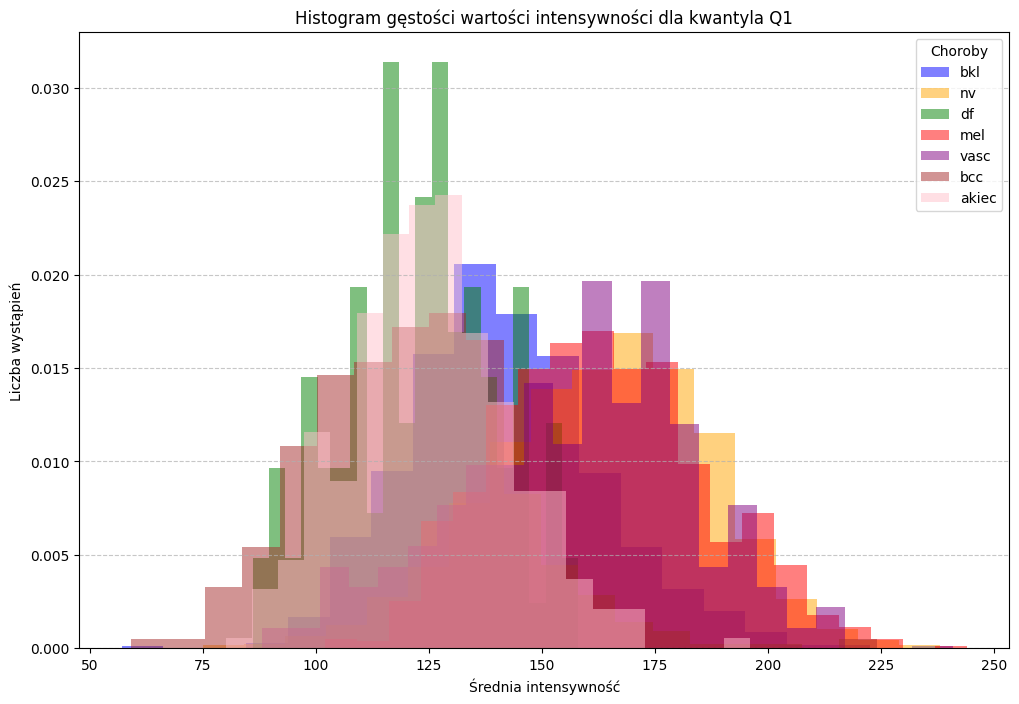

In [106]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask
    combined_no_zeros = np.quantile(combined[combined != 0], q = 0.25)

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości wartości intensywności dla kwantyla Q1")
plt.xlabel("Średnia intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


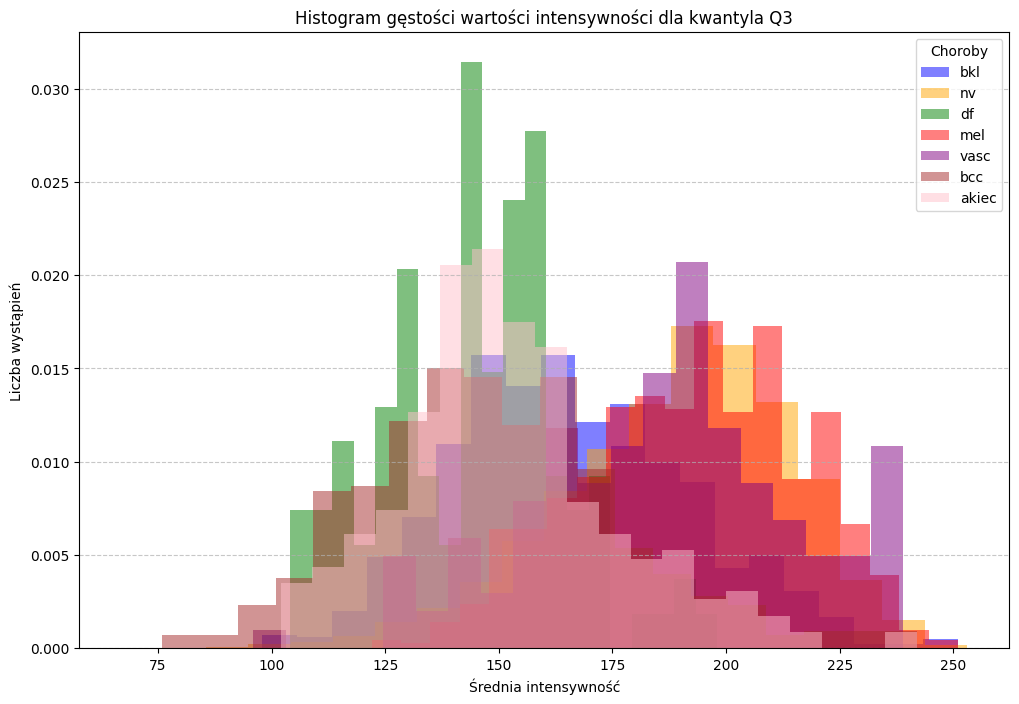

In [107]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask
    combined_no_zeros = np.quantile(combined[combined != 0], q = 0.75)

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości wartości intensywności dla kwantyla Q3")
plt.xlabel("Średnia intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


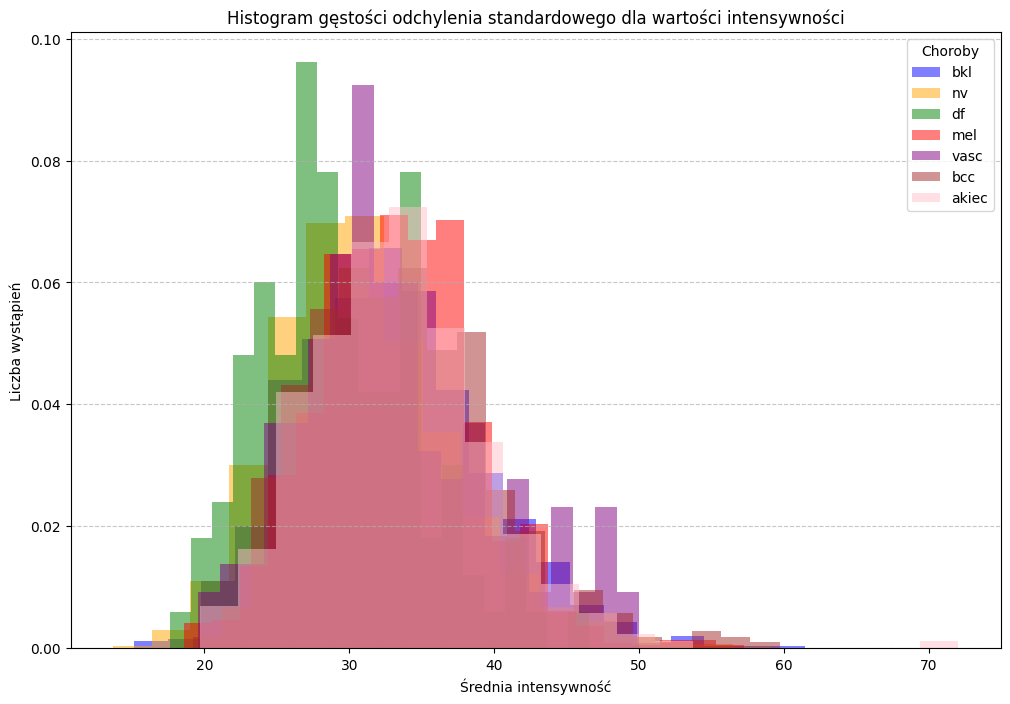

In [108]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask
    combined_no_zeros = np.std(combined[combined != 0])

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości odchylenia standardowego dla wartości intensywności")
plt.xlabel("Średnia intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


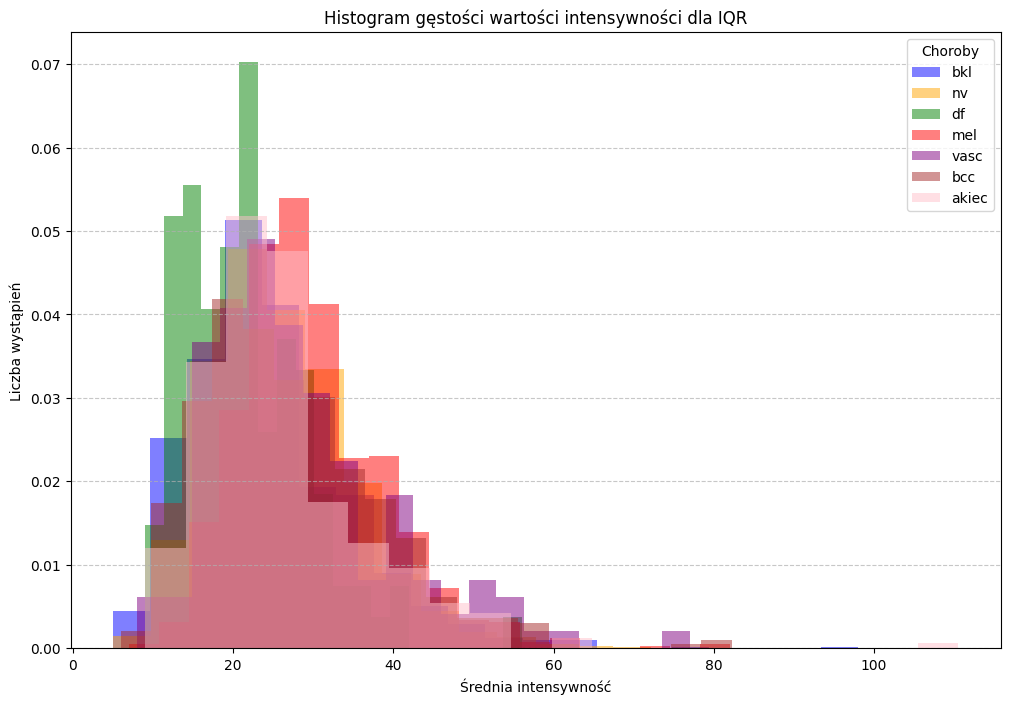

In [109]:
dist_by_disease = {disease: [] for disease in df_anno['dx'].unique()}

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask
    combined_no_zeros = np.quantile(combined[combined != 0], q = 0.75) - np.quantile(combined[combined != 0], q = 0.25)

    disease = df_anno['dx'].iloc[i]
    dist_by_disease[disease].append(combined_no_zeros)

plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for i, (disease, values) in enumerate(dist_by_disease.items()):
    plt.hist(values, bins=20, alpha=0.5, color=colors[i], label=disease, density = True)

plt.legend(title="Choroby")
plt.title("Histogram gęstości wartości intensywności dla IQR")
plt.xlabel("Średnia intensywność")
plt.ylabel("Liczba wystąpień")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


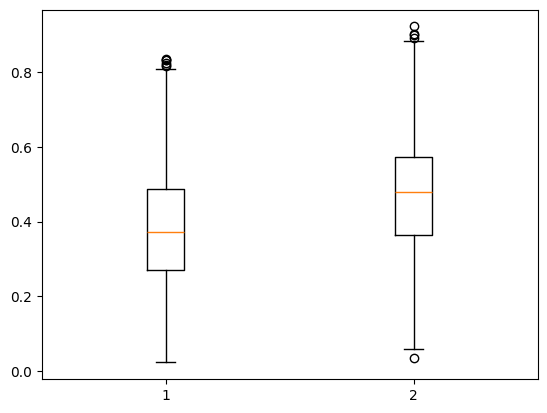

In [149]:
plt.boxplot([quantiles_015, quantiles_03]);

In [145]:
plt.rcParams['font.size'] = 10

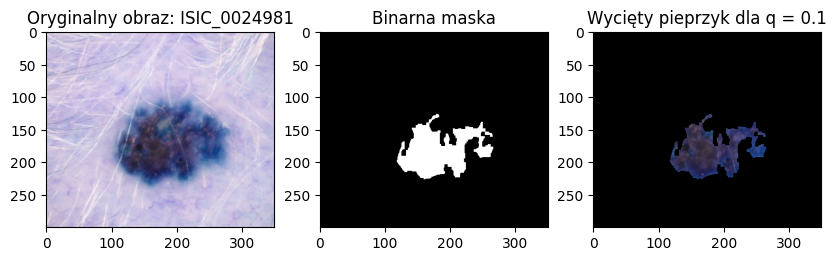

33
0.34509803921568627


In [147]:
#i = random.randint(0, len(df_anno) - 4)
i = 33
path = df_anno.image_id.iloc[i]
#path = "ISIC_0026057"
Q = 0.1
gray_image = read_img(path, grey=True)
zoomed = gray_image[50:350, 100:450]/255
zommed_to_vis = read_img(path, grey=False)
zommed_to_vis = zommed_to_vis[50:350, 100:450]
#zoomed = cv2.GaussianBlur(zoomed, (5, 5), 0)
q = np.quantile(zoomed, q = Q)
mask_binary = np.where(zoomed < q, 1, 0).astype(np.uint8)
kernel = np.ones((7, 7), np.uint8)
mask_binary = cv2.erode(mask_binary, kernel, iterations = 1)
kernel = np.ones((3, 3), np.uint8)

mask_binary = cv2.dilate(mask_binary, kernel, iterations = 1)
contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    largest_contour_mask = np.zeros_like(mask_binary)

    cv2.drawContours(largest_contour_mask, [largest_contour], -1, (1), thickness=cv2.FILLED)

    largest_contour_mask = np.expand_dims(largest_contour_mask, axis = -1)
    result = zommed_to_vis * largest_contour_mask

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title(f"Oryginalny obraz: {path}")
    plt.imshow(zommed_to_vis)

    plt.subplot(1, 3, 2)
    plt.title("Binarna maska")
    plt.imshow(largest_contour_mask, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title(f"Wycięty pieprzyk dla q = {Q}")
    plt.imshow(result)
    plt.show()
else:
    print("Nie znaleziono konturów.")
print(i)
print(q)

In [87]:
def read_img(img, full_path = './dataset/HAM10000/', grey = True, format = ".jpg"):
    img_out = cv2.imread(f"{full_path}{img}{format}")
    image_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

    if grey:
        img_out = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    return img_out

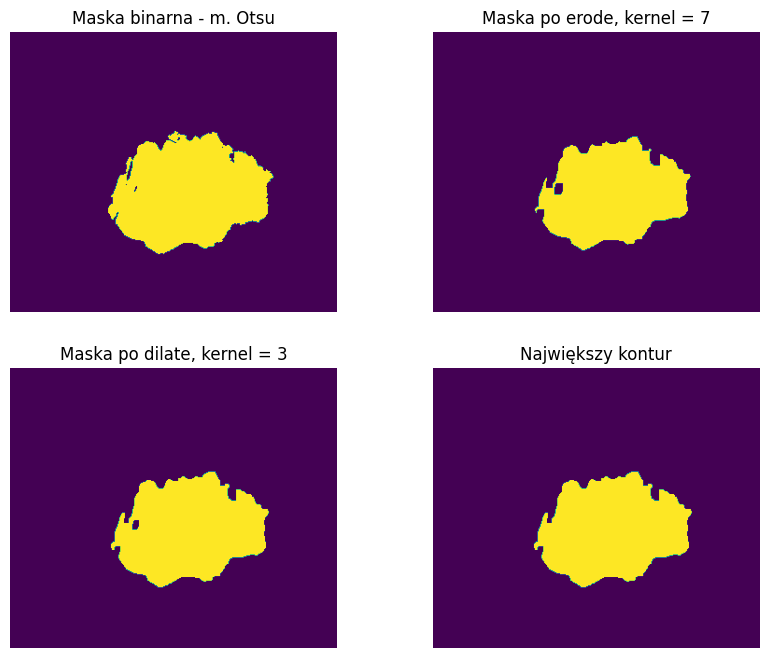

In [100]:
#i = random.randint(0, len(df_anno) - 4)
#path = df_anno.image_id.iloc[i]
#path = "ISIC_0026057"
i = 33
path = df_anno.image_id.iloc[i]

gray_image = read_img(path, grey=True)
image = read_img(path, grey=False)
zoomed_to_vis = image[50:350, 100:450]
zoomed = gray_image[50:350, 100:450]
#zoomed = cv2.GaussianBlur(zoomed, (5, 5), 0)
_, otsu_thresh = cv2.threshold(zoomed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask_binary = np.where(otsu_thresh > 0, 0, 1)
mask_0 = mask_binary.astype(np.uint8)
kernel = np.ones((7, 7), np.uint8)
mask_binary = cv2.erode(mask_0, kernel, iterations = 1)
kernel = np.ones((3, 3), np.uint8)
mask_1 = mask_binary
mask_binary = cv2.dilate(mask_binary, kernel, iterations = 1)
mask_2 = mask_binary
contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    largest_contour_mask = np.zeros_like(mask_binary)

    cv2.drawContours(largest_contour_mask, [largest_contour], -1, (1), thickness=cv2.FILLED)

    result = zoomed * largest_contour_mask
   # zoomed = cv2.cvtColor(zoomed, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes[0, 0].imshow(mask_0)
    axes[0, 0].set_title('Maska binarna - m. Otsu')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(mask_1)
    axes[0, 1].set_title('Maska po erode, kernel = 7')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(mask_2)
    axes[1, 0].set_title('Maska po dilate, kernel = 3')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(largest_contour_mask)
    axes[1, 1].set_title('Największy kontur')
    axes[1, 1].axis('off')

    plt.show()
else:
    print("Nie znaleziono konturów.")


In [155]:
def save_largest_contour_mask(image_path, output_folder):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    zoomed = gray_image[50:350, 100:450] / 255  
    zoomed_color = image[50:350, 100:450] / 255  
    _, otsu_thresh = cv2.threshold(zoomed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mask_binary = np.where(zoomed < otsu_thresh, 1, 0).astype(np.uint8) 
    kernel = np.ones((7, 7), np.uint8)
    mask_binary = cv2.erode(mask_binary, kernel, iterations = 1)
    kernel = np.ones((3, 3), np.uint8)
    mask_binary = cv2.dilate(mask_binary, kernel, iterations = 1)
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour_mask = np.zeros_like(mask_binary)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(largest_contour_mask, [largest_contour], -1, (1), thickness=cv2.FILLED)
        ellipse = cv2.fitEllipse(largest_contour)
        output_image = zoomed.copy()
        output_image_2 = zoomed_color.copy()
        cv2.ellipse(output_image_2, ellipse, (0, 1, 0), 2)
        (x, y), (major_axis, minor_axis), angle = ellipse
        
    filename = os.path.basename(image_path)  
    name, ext = os.path.splitext(filename)  
    mask_filename = f"{name}_mask{ext}"  
    elipse_file_name = f"{name}_elipse{ext}"

    output_path = os.path.join(output_folder, mask_filename)
    output_path_2 = os.path.join(output_folder, elipse_file_name)

    cv2.imwrite(output_path, (largest_contour_mask * 255).astype(np.uint8))
    cv2.imwrite(output_path_2, (output_image_2 * 255).astype(np.uint8))

    print(f"Maska i elipsa zapisana: {output_path}")

input_folder = "./dataset/data_with_mask_otsu"  
output_folder = "./dataset/data_with_mask_otsu"
os.makedirs(output_folder, exist_ok=True) 

for image_file in os.listdir(input_folder):
    image_path = os.path.join(input_folder, image_file)
    print(image_path)
    save_largest_contour_mask(image_path, output_folder)

/Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0030858.jpg
Maska i elipsa zapisana: /Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0030858_mask.jpg
/Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0030680.jpg
Maska i elipsa zapisana: /Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0030680_mask.jpg
/Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0033389.jpg
Maska i elipsa zapisana: /Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0033389_mask.jpg
/Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0032097.jpg
Maska i elipsa zapisana: /Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0032097_mask.jpg
/Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0032929.jpg
Maska i elipsa zapisana: /Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0032929_mask.jpg
/Users/htlusty/Documents/DYPLOMA/dataset/data_with_mask/ISIC_0026784.jpg
Maska i elipsa zapisana: /Users/htlusty/Documen

# HSV statistics

(300, 350) (300, 350, 3)
190 172
120


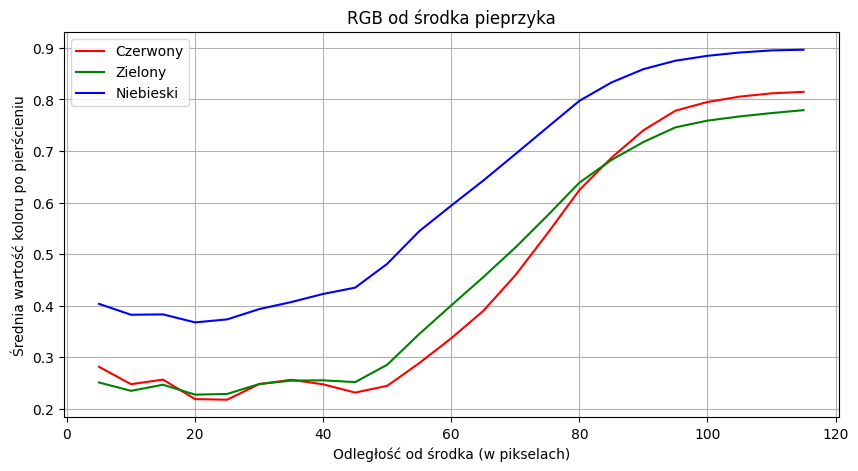

In [108]:
image = read_img(path, grey=False)
gray_image = read_img(path, grey = True)

zoomed = gray_image[50:350, 100:450] / 25
zoomed_color = image[50:350, 100:450] / 255  
print(zoomed.shape, zoomed_color.shape)
_, otsu_thresh = cv2.threshold(zoomed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask_binary = np.where(zoomed < otsu_thresh, 1, 0).astype(np.uint8) 
kernel = np.ones((7, 7), np.uint8)
mask_binary = cv2.erode(mask_binary, kernel, iterations = 1)
kernel = np.ones((3, 3), np.uint8)
mask_binary = cv2.dilate(mask_binary, kernel, iterations = 1)
contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)
    if M["m00"] != 0:
        center_x = int(M["m10"] / M["m00"])
        center_y = int(M["m01"] / M["m00"])
    else:
        center_x, center_y = zoomed_color.shape[1] // 2, zoomed_color.shape[0] // 2  
print(center_x, center_y)
max_radius = int(min(zoomed_color.shape[:2]) * 0.4) 
print(max_radius)
color_gradients = {'radius': [], 'mean_red': [], 'mean_green': [], 'mean_blue': []}

for r in range(5, max_radius, 5): 
    mask = np.zeros(zoomed.shape, dtype=np.uint8)
    cv2.circle(mask, (center_x, center_y), r, 1, thickness=5)

    mean_val = cv2.mean(zoomed_color, mask=mask)[:3]
    color_gradients['radius'].append(r)
    color_gradients['mean_red'].append(mean_val[0])
    color_gradients['mean_green'].append(mean_val[1])
    color_gradients['mean_blue'].append(mean_val[2])

plt.figure(figsize=(10, 5))
plt.plot(color_gradients['radius'], color_gradients['mean_red'], label='Czerwony', color='red')
plt.plot(color_gradients['radius'], color_gradients['mean_green'], label='Zielony', color='green')
plt.plot(color_gradients['radius'], color_gradients['mean_blue'], label='Niebieski', color='blue')
plt.xlabel('Odległość od środka (w pikselach)')
plt.ylabel('Średnia wartość koloru po pierścieniu')
plt.title('RGB od środka pieprzyka')
plt.legend()
plt.grid(True)
plt.show()


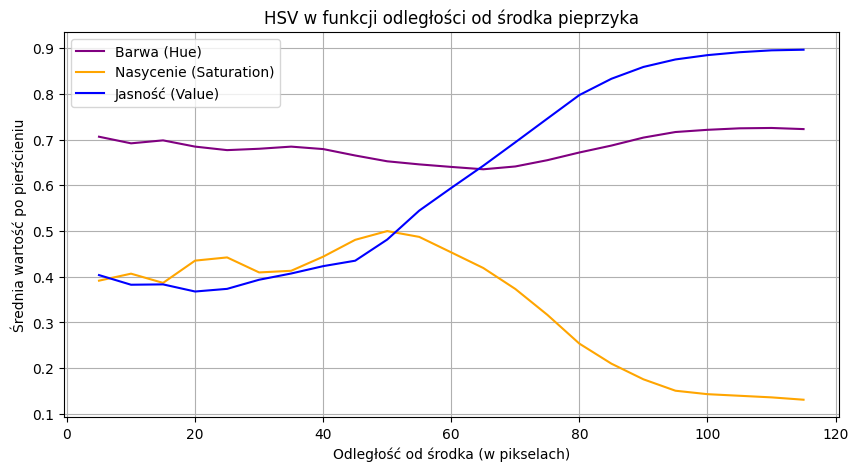

In [110]:
image = read_img(path, grey=False)  
gray_image = read_img(path, grey=True)

zoomed_color = image[50:350, 100:450] / 255.0  
hsv_image = cv2.cvtColor((zoomed_color * 255).astype(np.uint8), cv2.COLOR_RGB2HSV) 
zoomed_hue = hsv_image[:, :, 0] / 179.0  
zoomed_saturation = hsv_image[:, :, 1] / 255.0  
zoomed_value = hsv_image[:, :, 2] / 255.0 

zoomed = gray_image[50:350, 100:450] / 25.0
q = np.quantile(zoomed, q=0.3)
mask_binary = np.where(zoomed < q, 1, 0).astype(np.uint8)
kernel = np.ones((7, 7), np.uint8)
mask_binary = cv2.erode(mask_binary, kernel, iterations=1)
kernel = np.ones((3, 3), np.uint8)
mask_binary = cv2.dilate(mask_binary, kernel, iterations=1)
contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)
    if M["m00"] != 0:
        center_x = int(M["m10"] / M["m00"])
        center_y = int(M["m01"] / M["m00"])
    else:
        center_x, center_y = zoomed_color.shape[1] // 2, zoomed_color.shape[0] // 2

max_radius = int(min(zoomed_color.shape[:2]) * 0.4)

color_gradients = {'radius': [], 'mean_hue': [], 'mean_saturation': [], 'mean_value': []}

for r in range(5, max_radius, 5): 
    mask = np.zeros(zoomed_hue.shape, dtype=np.uint8)
    cv2.circle(mask, (center_x, center_y), r, 1, thickness=5)

    mean_hue = cv2.mean(zoomed_hue, mask=mask)[0]
    mean_saturation = cv2.mean(zoomed_saturation, mask=mask)[0]
    mean_value = cv2.mean(zoomed_value, mask=mask)[0]

    color_gradients['radius'].append(r)
    color_gradients['mean_hue'].append(mean_hue)
    color_gradients['mean_saturation'].append(mean_saturation)
    color_gradients['mean_value'].append(mean_value)

plt.figure(figsize=(10, 5))
plt.plot(color_gradients['radius'], color_gradients['mean_hue'], label='Barwa (Hue)', color='purple')
plt.plot(color_gradients['radius'], color_gradients['mean_saturation'], label='Nasycenie (Saturation)', color='orange')
plt.plot(color_gradients['radius'], color_gradients['mean_value'], label='Jasność (Value)', color='blue')
plt.xlabel('Odległość od środka (w pikselach)')
plt.ylabel('Średnia wartość po pierścieniu')
plt.title('HSV w funkcji odległości od środka pieprzyka')
plt.legend()
plt.grid(True)
plt.show()


# Statistic for all

In [89]:
srednia = []
mediana = []
minimum = []
maximum = []
pole = []
std = []
iqr = []
Q1 = []
Q3 = []
mean_saturation_list = []
major_ax = []
minor_ax = []
center_x = []
center_y = []
mean_saturation_change_list = []
std_saturation_change_list = []
median_saturation_change_list = []
increase_percentage_list = []
decrease_percentage_list = []

for i in range(len(df_anno.image_id)):
    path = df_anno.image_id.iloc[i]
    gray_image = read_img(path, grey=True)
    color_image = read_img(path, grey=False)
    mask_path = path + '_mask'
    mask = read_img(mask_path, grey=True)
    image_hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    zoomed = gray_image[50:350, 100:450]
    combined = zoomed * mask

    pieprzyk = combined[combined != 0]

    srednia.append(np.mean(pieprzyk))
    mediana.append(np.median(pieprzyk))
    minimum.append(np.min(pieprzyk))
    maximum.append(np.max(pieprzyk))
    pole.append(np.sum(pieprzyk))
    std.append(np.std(pieprzyk))
    iqr.append(maximum[-1] - minimum[-1])
    Q1.append(np.quantile(pieprzyk, q = 0.25))
    Q3.append(np.quantile(pieprzyk, q = 0.75))
    mean_saturation_list.append(np.mean(image_hsv[:, :, 1]))
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)
        if len(largest_contour) >= 5:
            ellipse = cv2.fitEllipse(largest_contour)
            cv2.ellipse(mask, ellipse, (0, 255, 0), 2)
            (x, y), (major_axis, minor_axis), angle = ellipse
    
    major_ax.append(major_axis)
    minor_ax.append(minor_axis)
    center_x.append(x)
    center_y.append(y)
    x, y = int(ellipse[0][0]), int(ellipse[0][1])
    major_axis = int(ellipse[1][0] / 2)  
    minor_axis = int(ellipse[1][1] / 2) 
    angle = ellipse[2]

    saturation_gradients = {'radius': [], 'mean_saturation': []}
    for r in range(5, major_axis, 5):
        mask = np.zeros(gray_image.shape, dtype=np.uint8)
        cv2.ellipse(mask, (x, y), (r, int(r * minor_axis / major_axis)), int(angle), 0, 360, 255, thickness=5)

        mean_saturation = cv2.mean(image_hsv[:, :, 1], mask=mask)[0]
        saturation_gradients['radius'].append(r)
        saturation_gradients['mean_saturation'].append(mean_saturation)

    saturation_gradients['saturation_change'] = np.diff(saturation_gradients['mean_saturation'], prepend=saturation_gradients['mean_saturation'][0])

    mean_saturation_change = np.mean(saturation_gradients['saturation_change'])
    std_saturation_change = np.std(saturation_gradients['saturation_change'])

    median_saturation_change = np.median(saturation_gradients['saturation_change'])

    increase_count = sum(1 for change in saturation_gradients['saturation_change'] if change > 0)
    decrease_count = sum(1 for change in saturation_gradients['saturation_change'] if change < 0)
    total_count = len(saturation_gradients['saturation_change'])
    increase_percentage = (increase_count / total_count) * 100
    decrease_percentage = (decrease_count / total_count) * 100

    mean_saturation_change_list.append(mean_saturation_change)
    std_saturation_change_list.append(std_saturation_change)
    median_saturation_change_list.append(median_saturation_change)
    increase_percentage_list.append(increase_percentage)
    decrease_percentage_list.append(decrease_percentage)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [91]:
df = pd.DataFrame({"path":df_anno.image_id, 
                   "disease" : df_anno.dx})

In [93]:
df["localization"] = df_anno["localization"]
df["age"] = df_anno["age"]

In [ ]:
df["mean"]

In [82]:
df_anno = df_anno[df_anno.image_id != 'ISIC_0027254']

In [83]:
df_anno.shape

(10014, 7)

In [95]:
df["mean"] = srednia
df["median"] = mediana
df["min"] = minimum
df["max"] = maximum
df["area"] = pole
df["std"] = std
df["iqr"] = iqr
df["Q1"] = Q1
df["Q3"] = Q3
df["mean_saturation"] = mean_saturation_list
df["major_ax"] = major_ax
df["minor_ax"] = minor_ax
df["center_x"] = center_x
df["center_y"] = center_y
df["mean_saturation_change"] = mean_saturation_change_list
df["std_saturation_change"] = std_saturation_change_list
df["median_saturation_change"] = median_saturation_change_list
df["increase_percentage"] = increase_percentage_list
df["decrease_percentage"] = decrease_percentage_list

In [98]:
df.to_csv("final_results.csv")